# Probabilistic Models

### Exercise: Stocking a vending machine
We simulate 1000 weeks worth of demand for beverages by drawing from the Poisson distribution and storing the result in a vector of length 1000. Notice that on line 4 we create the vector that will hold weekly demand values. In R, you cannot index into a vector unless the vector already exists.

In [8]:
## simulate 1000 weeks of demand from the vending machine

n <- 1000            # number of replications
demand <- numeric(n) # create a vector to hold the weekly demand

for (i in 1:n) {
    demand[i] <- rpois(1, 168)
}

We can estimate the probability of a stock-out by summing a vector of TRUE/FALSE values and then dividing by $n$. Here, we are using the fact that TRUE equates to one and FALSE equates to zero.

In [9]:
## estimated probability of a stock-out
sum(demand >= 180) / n

[1] 0.191

To estimate the average number of beverages remaining at the end of a week, we want to subtract average sales from 180, but we cannot sell more that 180 beverages. One of handling this is to simply truncate demand at 180. In general, putting some thought into naming variables will make your code easier to understand.

In [15]:
## estimate of number of beverages remaining at end of week
sales <- ifelse(sales > 180, 180, demand)
180 - mean(sales)

[1] 11.451

In [11]:
## estimate of probability that 150 or more beverages will be sold
sum(demand >= 150) / n

[1] 0.937

### Exercise: Car dealership

Here we obtain estimates of the exact probabilities for the car dealership problem. Rather than writing a loop, another option is to make 1000 draws from the Poisson(5) distribution and store them directly into a vector.

In [8]:
n <- 1000
numdents <- rpois(n, 5) # 1000 draws from the poisson(5) distribution
sum(numdents <= 1)/n    # estimate of probability that a car has <= 1 dent

[1] 0.038

In [9]:
0.30 * sum(numdents > 5)/n * 100 # estimated number of cars having > 5 dents

[1] 11.16

### Exercise: A mining operation

We perform 1000 replications of the number of scoops in one hour using the rpois() function, and store the values in a vector of length 1000. To estimate the probability that the time between consecutive trips is greater than one hour, we sum a vector of TRUE/FALSE values, where TRUE equates to one and FALSE equates to zero. Dividing by $n$ gives the propoertion of simulated scoop values that are strictly less than 10.

In [11]:
n <- 1000
numscoops <- rpois(n,7)  # 1000 draws from poisson(7) distribution

## estimated probability that the time required to load truck is >= 1 hour
sum(numscoops < 10)/n

[1] 0.833

We make 1000 replications of the time time between scoops (in muntes)by drawing from the Exponential distribution, using the rexp() function and a rate of 7/60 scoops per minute. To estimate the probability that the next scoop is ready within 5 minutes, we sum a vector of TRUE/FALSE values, where TRUE equates to one and FALSE equates to zero, and then divide by $n$. This gives the proportion of simulated times that are less than or equal to 5 minutes.

In [12]:
## simulate time betwwen scoops 1000 times
n <- 1000
rate <- 7/60 # scoops per minute
minutes <- rexp(n, rate)

## estimated probability that the next scoop is ready within 5 minutes
sum(minutes <= 5)/n

[1] 0.446

### Exercise: Time to failure

We use the rlnorm() function to simulate 1000 failure times and store the values in a vector. The estimated mean time to failure is the sample mean. To estimate the probability that the part lasts longer than 7 days, we sum a vector of TRUE/FALSE values, where TRUE equates to one and FALSE equates to zero, and then divide by $n$. This gives the proportion of simulated failure times that are greater than 7 years.

In [14]:
n <- 1000
ftime <- rlnorm(n, 1.6, 0.25)  # n draws from lognormal distribution

## estimated mean failure time
mean(ftime)

## estimated probability that part lasts longer than 7 years
sum(ftime > 7)/n

[1] 5.105517

[1] 0.083

### Exercise: Stocking a seasonal item

We create a vector of possible order quantities ranging from 150 to 250 chairs. For each order quantity value, we generate 1000 independent replications of demand $D$ where $D \sim \mathcal{N}\left(\mu=205,~\sigma=25\right)$  and calculate the realized profit. To find the expected profit, we take the average relized profit of the 1000 replications. The order quantity with the highest expected profit is the economic order quantity.

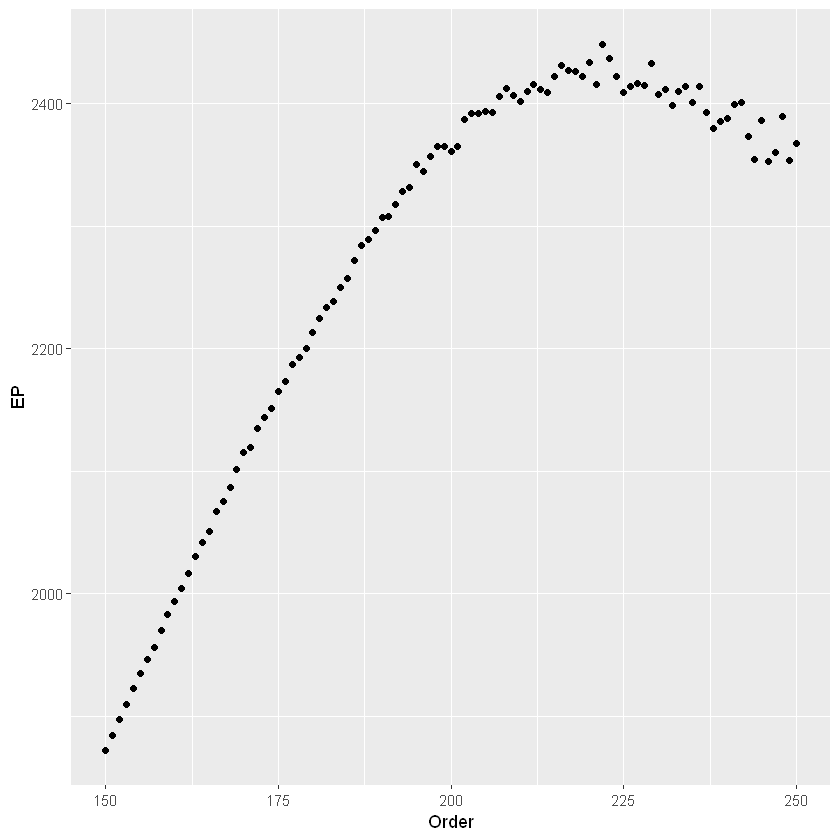

In [7]:
## estimate economic order quantity
Order <- 150:250                #number of chairs to order
EP <- numeric(length(Order))    #expected profit
B <- 1000                       #number of replications

for (x in Order) {
    P <- numeric(B)             #realized profits
    for (i in 1:B) {
        D <- rnorm(1, 205, 25)
        if (D >= x) {           #sell all chairs
            P[i] <- 12.5*x
        }
        else {                  #don't sell all chairs
            P[i] <- 27.5*D - 15*x + 10.5*(x - D)
        }
    }
    EP[which(x==Order)] <- mean(P)
}
chairs <- data.frame(Order, EP)
ggplot(chairs) + geom_point(aes(x=Order, y=EP))

The economic order quantity is about 220 chairs.

We perform 1000 replications of demand using the rnorm() function, and store the values in a vector of length 1000. To estimate the probability that all chairs are sold by the end of summer, we sum a vector of TRUE/FALSE values, where TRUE equates to one and FALSE equates to zero. Dividing by $n$ gives the proportion of simulated demand values that are greater than or equal to 220.

In [10]:
## estimate probability all chairs are sold by the end of summer
n <- 1000
demand <- numeric(n)
for(i in 1:n){
    demand[i] = rnorm(1, 205, 25)
}

sum(demand>=220)/n

[1] 0.264

To estimate the economic order quantity when the clearance price is 8 dollars, we do the same thing we did in part a, except we change the clearance price in the realized profits formula from 10.50 to 8.

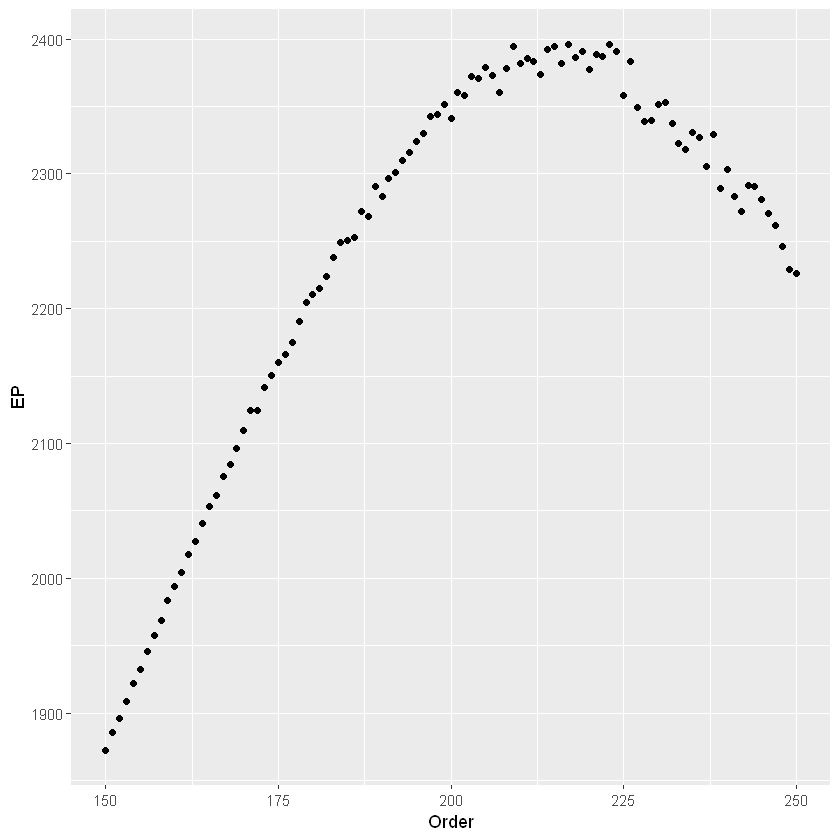

In [21]:
## estimate economic order quantity when clearance price = $8
Order <- 150:250                #number of chairs to order
EP <- numeric(length(Order))    #expected profit
B <- 1000                        #number of replications

for (x in Order) {
    P <- numeric(B)             #realized profits
    for (i in 1:B) {
        D <- rnorm(1, 205, 25)
        if (D >= x) {           #sell all chairs
            P[i] <- 12.5*x
        }
        else {                  #don't sell all chairs
            P[i] <- 27.5*D - 15*x + 8*(x - D)
        }
    }
    EP[which(x==Order)] <- mean(P)
}
chairs <- data.frame(Order, EP)
ggplot(chairs) + geom_point(aes(x=Order, y=EP))

The economic order quantity is about 214. As the clearance price decreases, the economic order quantity also decreses.